In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn import linear_model

In [343]:
hist_data = yf.Ticker('IDEA')
df = hist_data.history(period='10y')
df.shape

(2515, 7)

In [344]:
dir(df)

['Close',
 'Dividends',
 'High',
 'Low',
 'Open',
 'T',
 'Volume',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__firstlineno__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',

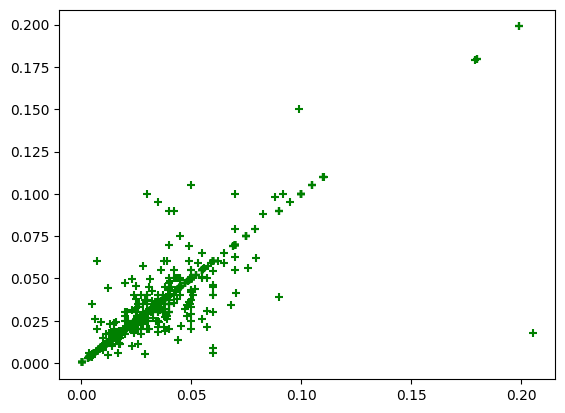

In [345]:
plt.scatter(df['Open'],df['Close'],c='green',marker='+')

In [346]:
df['next_close'] = df.Close.shift(-2)
df['next_open'] = df.Open.shift(-2)
df['next_high'] = df.High.shift(-2)
df['next_low'] = df.Low.shift(-2)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,next_close,next_open,next_high,next_low
Date,,,,,,,,,,,
2015-02-25 00:00:00-05:00,0.07,0.07,0.07,0.07,4900,0.0,0.0,0.07,0.07,0.07,0.07
2015-02-26 00:00:00-05:00,0.07,0.07,0.07,0.07,0,0.0,0.0,0.07,0.07,0.07,0.07
2015-02-27 00:00:00-05:00,0.07,0.07,0.07,0.07,0,0.0,0.0,0.07,0.07,0.07,0.07
2015-03-02 00:00:00-05:00,0.07,0.07,0.07,0.07,180,0.0,0.0,0.07,0.07,0.07,0.07
2015-03-03 00:00:00-05:00,0.07,0.07,0.07,0.07,0,0.0,0.0,0.07,0.07,0.07,0.07


In [347]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,next_close,next_open,next_high,next_low
Date,,,,,,,,,,,
2015-02-25 00:00:00-05:00,0.0700,0.0700,0.0700,0.0700,4900,0.0,0.0,0.0700,0.0700,0.0700,0.0700
2015-02-26 00:00:00-05:00,0.0700,0.0700,0.0700,0.0700,0,0.0,0.0,0.0700,0.0700,0.0700,0.0700
2015-02-27 00:00:00-05:00,0.0700,0.0700,0.0700,0.0700,0,0.0,0.0,0.0700,0.0700,0.0700,0.0700
2015-03-02 00:00:00-05:00,0.0700,0.0700,0.0700,0.0700,180,0.0,0.0,0.0700,0.0700,0.0700,0.0700
2015-03-03 00:00:00-05:00,0.0700,0.0700,0.0700,0.0700,0,0.0,0.0,0.0700,0.0700,0.0700,0.0700
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-18 00:00:00-05:00,0.0179,0.0179,0.0179,0.0179,0,0.0,0.0,0.0179,0.0179,0.0179,0.0179
2025-02-19 00:00:00-05:00,0.0179,0.0179,0.0179,0.0179,0,0.0,0.0,0.0179,0.0179,0.0179,0.0179
2025-02-20 00:00:00-05:00,0.0179,0.0179,0.0179,0.0179,0,0.0,0.0,0.0179,0.0127,0.0127,0.0114


In [348]:
df.dropna(inplace=True)

x = df[['Open','High','Low','Close','Volume']]
y = df[['next_open','next_high','next_low','next_close']]
y.head(2)

,next_open,next_high,next_low,next_close
Date,,,,
2015-02-25 00:00:00-05:00,0.07,0.07,0.07,0.07
2015-02-26 00:00:00-05:00,0.07,0.07,0.07,0.07


In [349]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [350]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [351]:
model.score(x_test,y_test)

0.5629988434795055

In [352]:
model.predict([[244.929993,	248.860001,	244.419998,	247.100006,	51225800]])

c:\Users\user\Desktop\Machine_Learning_Codes\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[210.77047481, 216.83292176, 205.58009604, 212.06603315]])